In [138]:
import requests, pandas, time, pandas, subprocess, json, hvplot.pandas

In [135]:
testonology_urls = {
    "Puppet": "https://raw.githubusercontent.com/kbarber/puppet-ontologies/master/puppet-disco/inferred.owl",
    "Human Desease": "https://raw.githubusercontent.com/DiseaseOntology/HumanDiseaseOntology/main/src/ontology/doid.owl",
    "ECO": "https://raw.githubusercontent.com/evidenceontology/evidenceontology/master/eco.owl"
}
testontologies = {}
for ontology_name, url in testonology_urls.items():
    response = requests.get(url)
    testontologies.update({ontology_name: response})

In [142]:
ontometrics = "http://localhost:9999/api"
neontometrics = "http://localhost:8085/api"

return_values = []
for run_nr in range(1,11):
    for ontology_name, testontology in testontologies.items():
        # New Opi / NEOntometrics 
        start_time = time.time()
        response = requests.post(neontometrics, data=testontology.content)
        end_time = time.time()
        response_time = end_time - start_time
        dockerStats = json.loads(subprocess.run(r"docker stats --no-stream --format json opi", shell=True, capture_output=True, text=True).stdout)
        dockerStats.update({
            "run_nr": run_nr,
            "ontology": ontology_name,
            "response_time": response_time,
            "status_code": response.status_code,
            "size": len(testontology.content)/1024,
        })
        return_values.append(dockerStats)
        
        # Old Opi / Ontometrics
        start_time = time.time()
        response = requests.post(ontometrics, data=testontology.content)
        end_time = time.time()
        response_time = end_time - start_time
        dockerStats = json.loads(subprocess.run(r"docker stats --no-stream --format json opi_old", shell=True, capture_output=True, text=True).stdout)
        dockerStats.update({
            "run_nr": run_nr,
            "ontology": ontology_name,
            "response_time": response_time,
            "status_code": response.status_code,
            "size": len(testontology.content)/1024,
        })
        return_values.append(dockerStats)
df = pandas.DataFrame.from_records(return_values)

In [144]:
df

BlockIO CPUPerc Container            ID MemPerc             MemUsage  \
0   0B / 0B   0.74%       opi  def5ec1fcff2   0.92%  288.2MiB / 30.72GiB   
1   0B / 0B   0.23%   opi_old  20fa43e9b68f   2.19%  687.5MiB / 30.72GiB   
2   0B / 0B   0.30%       opi  def5ec1fcff2   2.30%  724.3MiB / 30.72GiB   
3   0B / 0B   0.25%   opi_old  20fa43e9b68f  12.60%  3.871GiB / 30.72GiB   
4   0B / 0B   0.26%       opi  def5ec1fcff2   2.31%    725MiB / 30.72GiB   
5   0B / 0B   0.28%   opi_old  20fa43e9b68f  12.71%  3.904GiB / 30.72GiB   
6   0B / 0B   0.27%       opi  def5ec1fcff2   2.31%    726MiB / 30.72GiB   
7   0B / 0B   0.18%   opi_old  20fa43e9b68f  12.71%  3.904GiB / 30.72GiB   
8   0B / 0B  11.71%       opi  def5ec1fcff2   2.96%  930.5MiB / 30.72GiB   
9   0B / 0B   0.20%   opi_old  20fa43e9b68f  12.60%  3.869GiB / 30.72GiB   
10  0B / 0B  14.96%       opi  def5ec1fcff2   2.81%  883.6MiB / 30.72GiB   
11  0B / 0B   0.20%   opi_old  20fa43e9b68f  12.89%   3.96GiB / 30.72GiB   
12  0B / 0B   0.27%       opi  def5ec1fcff2   2.81%  884.2MiB / 30.72GiB   
13  0B / 0B   0.23%   opi_old  20fa43e9b68f  12.89%   3.96GiB / 30.72GiB   
14  0B / 0B   0.37%       opi  def5ec1fcff2   3.06%  963.7MiB / 30.72GiB   
15  0B / 0B   0.24%   opi_old  20fa43e9b68f  13.83%  4.248GiB / 30.72GiB   
16  0B / 0B  18.78%       opi  def5ec1fcff2   3.04%  957.1MiB / 30.72GiB   
17  0B / 0B   0.22%   opi_old  20fa43e9b68f  14.09%  4.329GiB / 30.72GiB   
18  0B / 0B   0.27%       opi  def5ec1fcff2   3.02%  949.9MiB / 30.72GiB   
19  0B / 0B   0.27%   opi_old  20fa43e9b68f  14.09%  4.329GiB / 30.72GiB   
20  0B / 0B   0.27%       opi  def5ec1fcff2   3.56%  1.093GiB / 30.72GiB   
21  0B / 0B   0.22%   opi_old  20fa43e9b68f  13.85%  4.255GiB / 30.72GiB   
22  0B / 0B   0.23%       opi  def5ec1fcff2   2.46%  774.9MiB / 30.72GiB   
23  0B / 0B   0.20%   opi_old  20fa43e9b68f  14.72%   4.52GiB / 30.72GiB   
24  0B / 0B   0.27%       opi  def5ec1fcff2   2.47%  775.5MiB / 30.72GiB   
25  0B / 0B   0.22%   opi_old  20fa43e9b68f  14.72%   4.52GiB / 30.72GiB   
26  0B / 0B   0.21%       opi  def5ec1fcff2   2.69%  847.6MiB / 30.72GiB   
27  0B / 0B   0.35%   opi_old  20fa43e9b68f  13.14%  4.036GiB / 30.72GiB   
28  0B / 0B   0.20%       opi  def5ec1fcff2   2.88%  904.3MiB / 30.72GiB   
29  0B / 0B   0.18%   opi_old  20fa43e9b68f  15.72%   4.83GiB / 30.72GiB   
30  0B / 0B   0.21%       opi  def5ec1fcff2   2.88%  906.4MiB / 30.72GiB   
31  0B / 0B   0.18%   opi_old  20fa43e9b68f  15.72%   4.83GiB / 30.72GiB   
32  0B / 0B   0.38%       opi  def5ec1fcff2   3.24%   1020MiB / 30.72GiB   
33  0B / 0B   0.20%   opi_old  20fa43e9b68f  14.20%  4.362GiB / 30.72GiB   
34  0B / 0B   0.17%       opi  def5ec1fcff2   3.24%   1020MiB / 30.72GiB   
35  0B / 0B   0.24%   opi_old  20fa43e9b68f  15.40%   4.73GiB / 30.72GiB   
36  0B / 0B   0.16%       opi  def5ec1fcff2   3.24%   1020MiB / 30.72GiB   
37  0B / 0B   0.20%   opi_old  20fa43e9b68f  15.40%   4.73GiB / 30.72GiB   
38  0B / 0B   0.24%       opi  def5ec1fcff2   3.00%  943.7MiB / 30.72GiB   
39  0B / 0B   0.18%   opi_old  20fa43e9b68f  16.68%  5.125GiB / 30.72GiB   
40  0B / 0B   0.18%       opi  def5ec1fcff2   3.00%    945MiB / 30.72GiB   
41  0B / 0B   0.25%   opi_old  20fa43e9b68f  16.69%  5.126GiB / 30.72GiB   
42  0B / 0B   0.17%       opi  def5ec1fcff2   3.02%  949.5MiB / 30.72GiB   
43  0B / 0B   0.19%   opi_old  20fa43e9b68f  16.69%  5.126GiB / 30.72GiB   
44  0B / 0B   3.08%       opi  def5ec1fcff2   3.10%  974.9MiB / 30.72GiB   
45  0B / 0B   0.23%   opi_old  20fa43e9b68f  16.69%  5.128GiB / 30.72GiB   
46  0B / 0B   0.26%       opi  def5ec1fcff2   3.11%  978.1MiB / 30.72GiB   
47  0B / 0B   0.28%   opi_old  20fa43e9b68f  15.48%  4.755GiB / 30.72GiB   
48  0B / 0B   0.24%       opi  def5ec1fcff2   3.11%  979.6MiB / 30.72GiB   
49  0B / 0B   0.18%   opi_old  20fa43e9b68f  15.48%  4.755GiB / 30.72GiB   
50  0B / 0B   0.27%       opi  def5ec1fcff2   3.55%  1.091GiB / 30.72GiB   
51  0B / 0B   0.20%   opi_old  20fa43e9b68f  15.46% 

In [143]:
df.to_csv("opi_old_new_comparison.csv")

:Bars   [Ontology,Calculation Engine]   (response_time)
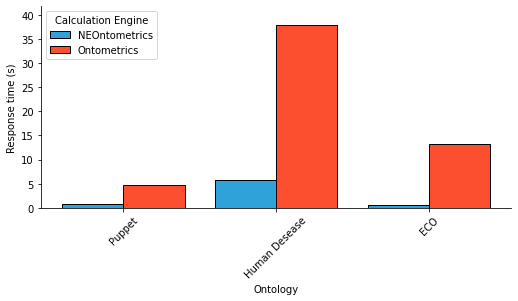

In [314]:
df = pandas.read_csv("opi_old_new_comparison.csv")
def convert_mem_to_floatmegabyte(input:str)->float:
    input = input.split(" / ")[0]
    if input.endswith("MiB"):
        input = float(input.replace("MiB", ""))
    elif input.endswith("GiB"):
        input = float(input.replace("GiB", ""))*1024
    return input
df.MemUsage = df.MemUsage.apply(convert_mem_to_floatmegabyte)
df.Name = df.Name.map({"opi":"NEOntometrics", "opi_old":"Ontometrics"})
hvplot.extension('matplotlib')
tmpdf = df.rename(columns={"Name":"Calculation Engine", "ontology":"Ontology"})
plot = tmpdf.hvplot.bar(x="Ontology", y="response_time", by="Calculation Engine", rot=45, legend="top_left", height=300, ylabel="Response time (s)",)
plot.opts(multi_level=False)
hvplot.save(plot, "response_time_comparison.svg")
plot

:Layout
   .NdOverlay.I  :NdOverlay   [Ontology]
      :Curve   [run_nr]   (response_time)
   .NdOverlay.II :NdOverlay   [Ontology]
      :Curve   [run_nr]   (response_time)
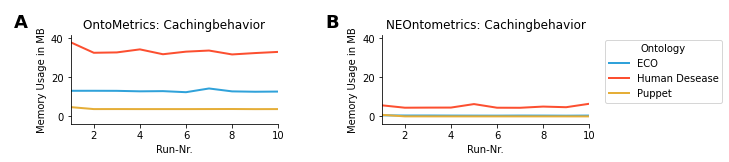

In [329]:
tmpdf = df[["run_nr", "Name", "response_time", "ontology"]].groupby(["run_nr", "Name", "response_time", "ontology"], as_index=False).mean()
tmpdf = df.rename(columns={"Name":"Calculation Engine", "ontology":"Ontology", "Name":"Calculation Engine"})
plot1 = tmpdf[tmpdf["Calculation Engine"] =="Ontometrics"].hvplot.line(title="OntoMetrics: Cachingbehavior", x="run_nr", height=300, ylabel="Memory Usage in MB", xlabel="Run-Nr.", y = ["response_time"], by=["Ontology"], legend=False)
plot2 = tmpdf[tmpdf["Calculation Engine"] =="NEOntometrics"].hvplot.line(title="NEOntometrics: Cachingbehavior", x="run_nr", height=300, ylabel="Memory Usage in MB", xlabel="Run-Nr.", y = ["response_time"], by=["Ontology"])
plot = plot1 + plot2
# hvplot.save(plot, "memory_usage_comparison.svg")
plot

:Bars   [run_nr,Calculation Engine]   (MemUsage)
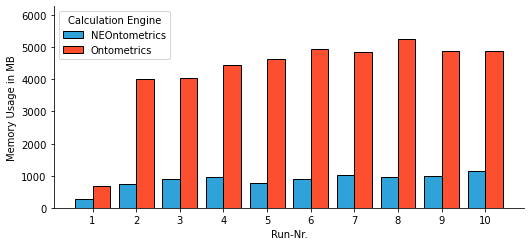

In [312]:
tmpdf = df[["run_nr", "Name", "MemUsage"]].groupby(["run_nr", "Name", "MemUsage"], as_index=False).mean()
tmpdf = df.rename(columns={"Name":"Calculation Engine", "ontology":"Ontology", "Name":"Calculation Engine"})
plot = tmpdf.hvplot.bar(x="run_nr", height=300, ylabel="Memory Usage in MB", xlabel="Run-Nr.", y = ["MemUsage"], by="Calculation Engine", legend="top_left")
plot.opts(multi_level=False)
hvplot.save(plot, "memory_usage_comparison.svg")
plot

Average Response Times

In [309]:
df.pivot_table(index="Name", columns="ontology", values="response_time", aggfunc="mean")

ontology             ECO  Human Desease    Puppet
Name                                             
NEOntometrics   0.452211       5.072893  0.110549
Ontometrics    13.014673      33.361873  3.871050

Average Response Times - Speedup

In [308]:
tmpdf = df.pivot_table(index="Name", columns="ontology", values="response_time", aggfunc="mean")
tmpdf / tmpdf.shift()

ontology           ECO  Human Desease     Puppet
Name                                            
NEOntometrics      NaN            NaN        NaN
Ontometrics    28.7801       6.576498  35.016565

Reduction in Memory Consumption

In [336]:
tmpdf = df.pivot_table(values=["MemUsage"], index="Name",  aggfunc="mean")
tmpdf = tmpdf / tmpdf.shift()
print(tmpdf.iloc[1])
tmpdf = df.pivot_table(values=["MemUsage"], index="Name", columns="run_nr", aggfunc="mean")
tmpdf / tmpdf.shift()

MemUsage    4.998919
Name: Ontometrics, dtype: float64


MemUsage                                                   \
run_nr               1         2         3         4         5        6    
Name                                                                       
NEOntometrics       NaN       NaN       NaN       NaN       NaN      NaN   
Ontometrics    4.977899  4.729968  4.576787  4.718124  5.423464  4.83849   

                                                       
run_nr               7         8         9         10  
Name                                                   
NEOntometrics       NaN       NaN       NaN       NaN  
Ontometrics    5.274021  5.295165  4.523207  5.687304